This project looks at customer age vs credit score using a decision tree model to classify credit card users into 1 of 3 categories; regular card user, infrequent card user, or frequent user.

##  Import modules and data 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

# Jupter notebook specific  --> '%' is used to configure the behavior of the IPython environment, in this case, it tells IPython
# to display Matplotlib plots directly in the output cells of a Jupyter notebook, rather than opening a separate window for 
# the plot.
%matplotlib inline


# data-viz

plt.style.use('fivethirtyeight')
plt.rcdefaults() # get the default theme

# modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing


# for ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [7]:
data = pd.read_csv("data.csv")


##  Data Inspection

###  Numerical inspection and summaries 

In [8]:
data.head()
df = data
df.head()

,Customer credit score,Customer age,Category of customer behaviour
0,570,57,Regular card user
1,600,31,Infrequent card user
2,610,36,Infrequent card user
3,590,45,Infrequent card user
4,620,50,Regular card user


In [9]:
#df.describe(include='all')
#“all” which forces pandas to include all the data types of the dataset to be included in the summary. 
#The string type values are accompanied by options such as unique, top, and frequency)

In [10]:
df.columns

Index(['Customer credit score', 'Customer age',
       'Category of customer behaviour'],
      dtype='object')

**Renaming columns for ease of use**

In [19]:
df.rename(columns = {'Customer credit score':'score', 
                    'Category of customer behaviour': 'behaviour', 
                    'Customer age' :'age'}, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   score      28 non-null     int64 
 1   age        28 non-null     int64 
 2   behaviour  28 non-null     object
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes


In [21]:
#check for the missing values
df.isna().sum()

score        0
age          0
behaviour    0
dtype: int64

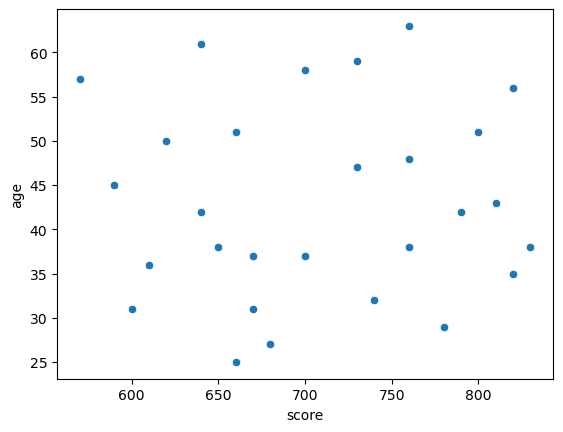

In [22]:
sns.scatterplot(x = "score", y = "age", data = df);

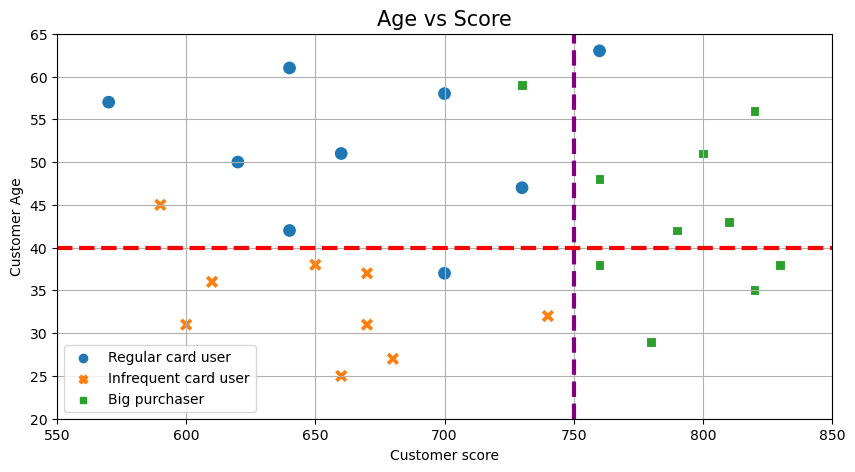

In [23]:
plt.figure(figsize = (10, 5 ))

sns.scatterplot(x = "score", y = "age", data = df, hue="behaviour", style = "behaviour", s= 100);

# adding labels
plt.ylabel("Customer Age");
plt.xlabel("Customer score")
plt.title("Age vs Score", fontsize = 15);

# axis limits
# plt.xlim([credit.score.min(), credit.score.max()]);
plt.grid()

plt.xlim([550, 850]);
plt.ylim([20, 65]);
plt.legend( loc = 'lower left');

# add lines
plt.axvline(x= 750, color = "purple", linewidth = 3, linestyle = '--')
plt.axhline(y= 40, color = "red", linewidth = 3, linestyle = '--');


**Added user-type lines via visual inspection**   
4 points are misclassified

In [24]:
# Getting the distribution of the card types
print(df.behaviour.value_counts())

print("\n") # this is to give space

# show the ratio
print(df.behaviour.value_counts(normalize = True).round(2))

Big purchaser           10
Regular card user        9
Infrequent card user     9
Name: behaviour, dtype: int64


Big purchaser           0.36
Regular card user       0.32
Infrequent card user    0.32
Name: behaviour, dtype: float64


### Modelling Decision Trees


**Data pre-processing** 

ENCODING: Scikit learn library can't use the 'strings' columns directly, so converting _strings_ to numbers and then feed into the model. 


In [25]:
# check the unique values in behaviour column
df['behaviour'].unique()

array(['Regular card user', 'Infrequent card user', 'Big purchaser'],
      dtype=object)

In [26]:
# convert the string into numbers

# calling the module
le_beh = preprocessing.LabelEncoder()

# fitting the transformer
le_beh.fit(['Regular card user', 'Infrequent card user', 'Big purchaser'])

# assigning it to the credit column
df["behaviour_encoded"] = le_beh.transform(df["behaviour"]) 

# exploring the data
df.head()

,score,age,behaviour,behaviour_encoded
0,570,57,Regular card user,2
1,600,31,Infrequent card user,1
2,610,36,Infrequent card user,1
3,590,45,Infrequent card user,1
4,620,50,Regular card user,2


In [27]:
df.behaviour_encoded.unique()

array([2, 1, 0])

In [28]:
df.behaviour.unique()

array(['Regular card user', 'Infrequent card user', 'Big purchaser'],
      dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   score              28 non-null     int64 
 1   age                28 non-null     int64 
 2   behaviour          28 non-null     object
 3   behaviour_encoded  28 non-null     int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 912.0+ bytes


**Split data into features(X) and target (y)**

In [31]:
# splitting the data into features and target
x = df[['score', 'age']]
y = df['behaviour_encoded']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

In [33]:
x.shape

(28, 2)

In [34]:
y.shape

(28,)

**Model Fitting**

In [35]:
# Call the model ....Gini method is default
dt = DecisionTreeClassifier()

# fit the model on train 
dt.fit(x_train, y_train)

# predict on train / test 
train_pred = dt.predict(x_train)
test_pred = dt.predict(x_test)

# score 
print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

1.0
0.3333333333333333


In [36]:
dt = DecisionTreeClassifier(criterion = 'entropy')

#fit the model on train 
dt.fit(x_train, y_train)

#predict on train / test 
train_pred = dt.predict(x_train)
test_pred = dt.predict(x_test)

#score 
print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

1.0
0.3333333333333333


Running a `for-loop` to see how changing the value of the `max_depth` changes the accuracy score

In [27]:
train_accuracy = []
test_accuracy = []

for depth in range(1,6):
    
    # Call the model ..yooo whoooo 
    dt = DecisionTreeClassifier(max_depth = depth)

    # fit the model on train 
    dt.fit(x_train, y_train)

    # predict on train / test 
    # train_accuracy.accuracy_score = dt.predict(x_train)
    test_pred = dt.predict(x_test)

    # score 
    print(metrics.accuracy_score(y_train, train_pred))
    print(metrics.accuracy_score(y_test, test_pred))
    print("--------")  #nice

1.0
0.16666666666666666
--------
1.0
0.6666666666666666
--------
1.0
0.5
--------
1.0
0.3333333333333333
--------
1.0
0.3333333333333333
--------


In [37]:
from sklearn import tree

**Why only 5 iterations?...when it seems like I told it a range of 1-6**

***Why..the deeper it gets, the less accurate the test score is***

In [38]:
model = tree.DecisionTreeClassifier()

In [39]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
model.score(x_test,y_test)

0.3333333333333333

In [41]:
model.score(x, y)

0.8571428571428571

In [42]:
model.predict([[570,57]])

array([1])

In [43]:
model.predict([[840,30]])

array([0])

In [44]:
model.predict([[650,60]])

array([2])

In [45]:
x.shape

(28, 2)

In [46]:
y.shape

(28,)

In [47]:
from sklearn.model_selection import GridSearchCV

d_tree = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],
             'max_depth':[x for x in range(1,10)],
             'min_samples_leaf':[x for x in range(1,7)],
             'min_samples_split':[x for x in range(1,7)]}
g_grid = GridSearchCV(d_tree, param_grid=param_grid, cv=10)

In [48]:
import time
start_time = time.time()
g_grid.fit(x,y)
print('%s seconds' % (time.time() - start_time))

9.661168575286865 seconds


In [49]:
g_grid.best_score_

0.7333333333333333

In [50]:
g_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [74]:
model_2 = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=2)

In [75]:
model_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [76]:
model_2.score(x_test,y_test).round(4)

0.6667

In [77]:
model_2.score(x, y)

0.8571428571428571

In [78]:
model_2.predict([[570,57]])

array([2])

In [79]:
model_2.predict([[840,30]])

array([0])

In [84]:
model_2.predict([[650,25]])

array([1])

In [85]:
model_2.predict([[750,40]])

array([1])

In [86]:
import pickle

In [89]:
filename = 'credit_card_model.sav'
pickle.dump(model_2, open(filename, 'wb'))

print("file exported")

file exported
